### Laboratorio 6
#### GANs
- Paola de Leon 20361
- Gabriela Contreras 20213

In [13]:
#imports 
import cv2
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Reshape, Flatten, Dense, Conv2D, Conv2DTranspose, LeakyReLU
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


Cargar datos y procesamiento

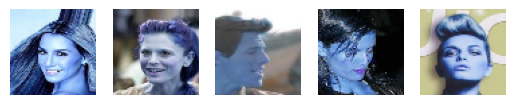

In [3]:

data_dir = "./archive/img_align_celeba"
image_dir = os.path.join(data_dir, "img_align_celeba")

# Lista de archivos
image_files = os.listdir(image_dir)

target_size = (64, 64)

preprocessed_images = []

for file in image_files:
    # Cargar la imagen
    image = cv2.imread(os.path.join(image_dir, file))
    
    # Redimensionar
    image = cv2.resize(image, target_size)
    
    # Normalizar
    image = image.astype(np.float32) / 255.0
    
    preprocessed_images.append(image)

preprocessed_images = np.array(preprocessed_images)

# Mostrar imágenes procesadas
num_images_to_show = 5

for i in range(num_images_to_show):
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(preprocessed_images[i])
    plt.axis('off')

plt.show()

Modelo 

In [14]:
# Dimensiones de las imágenes 
image_shape = (64, 64, 3)

# Definir el generador
def generador(input_shape):
    model = tf.keras.Sequential()
    model.add(Dense(256, input_shape=input_shape))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(np.prod(image_shape), activation='sigmoid'))
    model.add(Reshape(image_shape))
    return model

# discriminador
def discriminador(input_shape):
    model = tf.keras.Sequential()
    model.add(Flatten(input_shape=input_shape))
    model.add(Dense(1024))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(512))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(256))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Dense(1, activation='sigmoid'))
    return model


In [15]:
# Crear el generador y el discriminador
generator = generador(input_shape=(100,))
discriminator = discriminador(input_shape=image_shape)

# Compilacion del modelo y del discriminador
discriminator.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5), metrics=['accuracy'])

discriminator.trainable = False 
gan_input = Input(shape=(100,))
x = generator(gan_input)
gan_output = discriminator(x)
gan = Model(gan_input, gan_output)
gan.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.0002, beta_1=0.5))



Entrenamiento 

In [16]:
batch_size = 64
epochs = 10000

for epoch in range(epochs):
    idx = np.random.randint(0, preprocessed_images.shape[0], batch_size)
    real_images = preprocessed_images[idx]
    fake_images = generator.predict(np.random.randn(batch_size, 100))
    discriminator_loss_real = discriminator.train_on_batch(real_images, np.ones((batch_size, 1)))
    discriminator_loss_fake = discriminator.train_on_batch(fake_images, np.zeros((batch_size, 1)))
    discriminator_loss = 0.5 * np.add(discriminator_loss_real, discriminator_loss_fake)
    
    noise = np.random.randn(batch_size, 100)
    generator_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))
    
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, D Loss: {discriminator_loss[0]}, G Loss: {generator_loss}")


2/2 [==============================] - 0s 39ms/step
Epoch 0, D Loss: 7.39004248380661, G Loss: 0.024736452847719193
2/2 [==============================] - 0s 13ms/step
Epoch 100, D Loss: 0.10548689216375351, G Loss: 3.0591626167297363
2/2 [==============================] - 0s 11ms/step
Epoch 200, D Loss: 0.3458406403660774, G Loss: 1.1819778680801392
2/2 [==============================] - 0s 13ms/step
Epoch 300, D Loss: 0.5755415856838226, G Loss: 1.2774056196212769
2/2 [==============================] - 0s 12ms/step
Epoch 400, D Loss: 0.32157565653324127, G Loss: 1.3726646900177002
2/2 [==============================] - 0s 16ms/step
Epoch 500, D Loss: 0.3552931547164917, G Loss: 1.7776174545288086
2/2 [==============================] - 0s 24ms/step
Epoch 600, D Loss: 0.6056511551141739, G Loss: 1.5034716129302979
2/2 [==============================] - 0s 56ms/step
Epoch 700, D Loss: 0.7294399738311768, G Loss: 1.3113542795181274
2/2 [==============================] - 0s 27ms/step
Epoc

In [17]:
print("Entrenamiento Completado")   

Entrenamiento Completado


Resultados

C:\Users\Contreras GP\AppData\Local\Temp\ipykernel_4116\3146501960.py:11: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, num_images_to_show, i + 1)


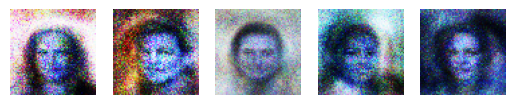

In [30]:
ruido = tf.random.normal(shape = [10, 100])
ruido.shape
plt.imshow(ruido)
imagenes = generator(ruido)

num_images_to_show = 5

for i in range(num_images_to_show):
    plt.subplot(1, num_images_to_show, i + 1)
    plt.imshow(imagenes[i])
    plt.axis('off')

plt.show()

Reflexión 